# Conférences Python Master TIDE #5

1. **Web scraping**
2. **API**

&copy; 2025 Francis Wolinski

## 0. Rappels

1. **Protocoles HTTP / HTTPS**

- **HTTP** : HyperText Transfer Protocol, protocole permettant au client (navigateur / script) de communiquer avec un serveur web.
- **HTTPS** : HyperText Transfer Protocol Secure, version sécurisée de HTTP, chiffrée via TLS (Transport Layer Security).

Il existe plusieurs méthodes dont :
- *GET* : envoie une requête pour obtenir une ressource. Les paramètres sont dans l’URL.
- *POST* : envoie des données dans le corps de la requête (formulaires, connexions), plus adapté pour transmettre des informations sensibles ou volumineuses.

Les **entêtes HTTP** (HTTP headers) sont des informations supplémentaires envoyées avec chaque requête et réponse HTTP. Elles décrivent le contexte de la communication : type de contenu attendu ou envoyé (`Content-Type`), informations sur le client (`User-Agent`), gestion du cache (`Cache-Control`), cookies, authentification, encodage, etc. Pour le web scraping, modifier certains entêtes — par exemple le `User-Agent` — permet de se faire reconnaître comme un navigateur classique, tandis qu’en lire d’autres aide à comprendre comment le serveur gère la session ou les données retournées.

2. **HTML et balises de base**

**HTML** : HyperText Markup Language, langage qui structure le contenu d’une page web :

- `<p>…</p>` : paragraphe de texte.
- `<br />` : retour à la ligne (balise autofermante).

Ces balises constituent la structure que le web scraper va analyser pour extraire des données.

3. **CSS**

**CSS** : Cascading Style Sheets

- *id* : identifiant unique d’un élément dans une page, utile pour cibler précisément un élément,
- *class* : groupe d’éléments partageant le même style ou comportement),
- *style* : définition directe d’un style sur l’élément.

Exemple:

```html
<p id="1234", class="class1 class2", style="color:blue;font-size:20px;">Exemple de paragraphe.</p>
```

En scraping, les tags et les attributs *id* et *class* servent souvent à sélectionner les bons éléments dans le DOM.

<p id="1234", class="class1 class2", style="color:blue;font-size:20px;">Exemple de paragraphe.</p>

## 1. Web Scraping

- Extraction d'informations d'un site web.
- A utiliser en l'absence de données ouvertes ou d'API.
- Technique fragile car le site web peut changer du jour au lendemain.
- Problématique juridique...

**Avec requests et Beautiful Soup**

Doc :
- **requests** : https://requests.readthedocs.io/en/master/
- **Beautiful Soup** : https://beautiful-soup-4.readthedocs.io/en/latest/

Pages de test :
- https://yotta-conseil.fr/cours/page2.html
- https://yotta-conseil.fr/cours/page3.html

Miroir du site : http://kim.fspot.org/

In [1]:
import requests

r = requests.get('https://yotta-conseil.fr/cours/page2.html')
r.status_code

200

In [2]:
# type
type(r.content)

bytes

In [3]:
# str en précisant un encodage
content = r.content.decode('utf-8')
type(content)

str

In [4]:
content

'<!DOCTYPE html>\r\n<html lang="en"><head>\r\n<meta http-equiv="content-type" content="text/html; charset=UTF-8">\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="stylesheet" href="page2_fichiers/pure-min.css" integrity="sha384-oAOxQR6DkCoMliIh8yFnu25d7Eq/PHS21PClpwjOTeU2jRSq11vu66rf90/cZr47" crossorigin="anonymous">\r\n    <link rel="stylesheet" href="page2_fichiers/grids-responsive-min.css">\r\n    <link rel="stylesheet" href="page2_fichiers/page2.css">\r\n</head>\r\n<body>\r\n\r\n<div class="pure-menu pure-menu-horizontal">\r\n    <a href="#" class="pure-menu-heading">Your Logo</a>\r\n    <ul class="pure-menu-list">\r\n        <li class="pure-menu-item"><a href="#" class="pure-menu-link">Home</a></li>\r\n        <li class="pure-menu-item pure-menu-selected"><a href="#" class="pure-menu-link">Pricing</a></li>\r\n        <li class="pure-menu-item"><a href="#" class="pure-menu-link">Contact</a></li>\r\n    </u

In [5]:
# BeautifulSoup

from bs4 import BeautifulSoup

soup = BeautifulSoup(content, "html.parser")
soup

<!DOCTYPE html>

<html lang="en"><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link crossorigin="anonymous" href="page2_fichiers/pure-min.css" integrity="sha384-oAOxQR6DkCoMliIh8yFnu25d7Eq/PHS21PClpwjOTeU2jRSq11vu66rf90/cZr47" rel="stylesheet"/>
<link href="page2_fichiers/grids-responsive-min.css" rel="stylesheet"/>
<link href="page2_fichiers/page2.css" rel="stylesheet"/>
</head>
<body>
<div class="pure-menu pure-menu-horizontal">
<a class="pure-menu-heading" href="#">Your Logo</a>
<ul class="pure-menu-list">
<li class="pure-menu-item"><a class="pure-menu-link" href="#">Home</a></li>
<li class="pure-menu-item pure-menu-selected"><a class="pure-menu-link" href="#">Pricing</a></li>
<li class="pure-menu-item"><a class="pure-menu-link" href="#">Contact</a></li>
</ul>
</div>
<div class="banner">
<h1 class="banner-head">
        Simple Pricing.<br/>
        Try befor

Accès au texte brut

In [6]:
# accès au texte brut
soup.get_text()

'\n\n\n\n\n\n\n\n\n\n\nYour Logo\n\nHome\nPricing\nContact\n\n\n\n\r\n        Simple Pricing.\r\n        Try before you buy.\r\n    \n\n\n\n\n\n\nPersonal\n\r\n                        $5 per month\n\n\n\nFree setup\nCustom sub-domain\nStandard customer support\n1GB file storage\n1 database\nUnlimited bandwidth\n\nChoose\n\n\n\n\n\nSmall Business\n\r\n                        $25 per month\n\n\n\nFree setup\nUse your own domain\nStandard customer support\n10GB file storage\n5 databases\nUnlimited bandwidth\n\nChoose\n\n\n\n\n\nEnterprise\n\r\n                        $45 per month\n\n\n\nFree setup\nUse your own domain\nPremium customer support\n100GB file storage\n25 databases\nUnlimited bandwidth\n\nChoose\n\n\n \n\n\n\nGet started today\n\r\n                    Lorem ipsum dolor sit amet, consectetur adipisicing \r\nelit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.\r\n Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do \r\neiusmod tempor incididunt 

Pour extraire des éléments particuliers, on utilise différentes méthodes :
    
- `.find(tag, attrs)` : trouve le premier tag avec les attributs spécifiés (en général *id* et/ou *class*)
- `.findAll(tag, attrs)` : trouve tous les tags avec les attributs spécifiés (en général *id* et/ou *class*)
- `.select(css)` : trouve tous les tags avec les CSS spécifiées
- etc.

La technique consiste par exemple à alimenter un dictionnaires avec les valeurs trouvées :
- soit en utilisant `tag.attrs['attribut']` pour collecter la valeur `'attribut'` du tag
- soit en utilisant `tag.text` pour collecter la valeur `text` située entre les balises ouvrante et fermante,
- on peut aussi utiliser d'autres méthodes comme `.select()` qui joue sur la CSS ou `.next_sibling()` pour collecter le tag identique suivant,
- éventuellement en recherchant dans un nouveau tag à l'intérieur d'un tag donné
- parfois, il faut tester si la méthode `.find()` retourne bien un élément ou `None`.

In [7]:
# exploration du HTML

div_tag = soup.find('div', attrs={'class': 'pricing-table'})
div_tag

<div class="pricing-table pricing-table-free">
<div class="pricing-table-header">
<h2>Personal</h2>
<span class="pricing-table-price">
                        $5 <span>per month</span>
</span>
</div>
<ul class="pricing-table-list">
<li>Free setup</li>
<li>Custom sub-domain</li>
<li>Standard customer support</li>
<li>1GB file storage</li>
<li>1 database</li>
<li>Unlimited bandwidth</li>
</ul>
<button class="button-choose pure-button">Choose</button>
</div>

Méthode :
 1. On collecte les informations d'un  tag pour un seul enregistrement sous la forme d'un dictionaire.
 2. On généralise en bouclant sur tous les tags de même nature et on rassemble les dictionnaires dans une liste.
 3. On transforme la liste de dictionaires en DataFrame.

In [8]:
# 1. collecte des informations pour un enregistrement
row = {}

div_tag = soup.find('div', attrs={'class': 'pricing-table'})

# type : Personal, Small Business, Enterprise
h2_tag = div_tag.find("h2")
row["type"] = h2_tag.text

# price
span_tag = div_tag.find("span", attrs={'class': 'pricing-table-price'})
row["price"] = span_tag.text.strip().split()[0]

# storage, database
lis = div_tag.select("li")
row["storage"] = lis[3].text.split()[0]
row["database"] = lis[4].text.split()[0]

row

{'type': 'Personal', 'price': '$5', 'storage': '1GB', 'database': '1'}

In [9]:
# 2. collecte des informations pour tous les enregistrements
rows = []

for div_tag in soup.find_all('div', attrs={'class': 'pricing-table'}):
    row = {}
    
    # type : Personal, Small Business, Enterprise
    h2_tag = div_tag.find("h2")
    row["type"] = h2_tag.text
    
    # price
    span_tag = div_tag.find("span", attrs={'class': 'pricing-table-price'})
    row["price"] = span_tag.text.strip().split()[0]
    
    # storage, database
    lis = div_tag.select("li")
    row["storage"] = lis[3].text.split()[0]
    row["database"] = lis[4].text.split()[0]
    
    rows.append(row)

rows

[{'type': 'Personal', 'price': '$5', 'storage': '1GB', 'database': '1'},
 {'type': 'Small Business',
  'price': '$25',
  'storage': '10GB',
  'database': '5'},
 {'type': 'Enterprise', 'price': '$45', 'storage': '100GB', 'database': '25'}]

In [10]:
# 3. transformation en DataFrame
import pandas as pd
df = pd.DataFrame(rows)
df

,type,price,storage,database
0,Personal,$5,1GB,1
1,Small Business,$25,10GB,5
2,Enterprise,$45,100GB,25


In [16]:
# avec une fonction
def get_product_info(div_tag):
    row = {}

    # type : Personal, Small Business, Enterprise
    h2_tag = div_tag.find("h2")
    row["type"] = h2_tag.text

    # price
    span_tag = div_tag.find("span", attrs={'class': 'pricing-table-price'})
    row["price"] = span_tag.text.strip().split()[0]

    # storage, database
    lis = div_tag.select("li")
    row["storage"] = lis[3].text.split()[0]
    row["database"] = lis[4].text.split()[0]
    
    return row

def extract_products(url):
    try:
        r = requests.get(url)
        
    except requests.exceptions.RequestException as e:
        print(e)
        return

    # Soup
    soup = BeautifulSoup(r.content, "html.parser")

    # list comprehension with all results
    #  rows = [get_product_info(div_tag) for div_tag in soup.find_all('div', attrs={'class': 'pricing-table'})]
    rows = [get_product_info(div_tag) for div_tag in soup.select("div.pricing-table")]

    # DataFrame with all results
    df = pd.DataFrame(rows)
    
    return df

#  df = extract_products("https://yotta-conseil.fr/cours/page2.html")
df = extract_products("https://yotta-conseil.fr/cours/page3.html")
df

,type,price,storage,database
0,Personal,$5,1GB,1
1,Small Business,$25,10GB,5
2,Enterprise,$45,100GB,25
3,Privilege,$99,1TB,100


In [19]:
r = requests.get("https://www.leboncoin.fr/")
r.content.decode("utf-8")

'<html lang="en"><head><title>leboncoin.fr</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={\'rt\':\'c\',\'cid\':\'AHrlqAAAAAMA4dVqpqfePzcAwTdj8w==\',\'hsh\':\'05B30BD9055986BD2EE8F5A199D973\',\'t\':\'bv\',\'qp\':\'\',\'s\':2089,\'e\':\'95e0305cc275ac7c2f3452c5f493576f3482b9b0fd83575dd4abb7800785d9ecf7017a2151d372c089622629e862070e\',\'host\':\'geo.captcha-delivery.com\',\'cookie\':\'YI6ke8FBGx55Z3Wz5bNgS8_PSX8AuFLrlryoUxcA9YiqmQY5DVOLwApO2~zSnHy2BT5aJ6wMtrPTMG49_AUqF8biskTypJzZ1PjXEhOMD4aftE9vjgvDmoV12_Rrg7pw\'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>'

**Exercices**

- Remplacer la méthode `.find_all()` par la méthode `.select()`
- Web scrapping de la page : https://yotta-conseil.fr/cours/page3.html
- Web scrapping de la page : https://books.toscrape.com/catalogue/category/books/travel_2/index.html

In [22]:
r = requests.get("https://books.toscrape.com/catalogue/category/books/travel_2/index.html")
soup = BeautifulSoup(r.content)

In [38]:
soup.find("p").

<p class="star-rating Two">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [45]:
r = requests.get("https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html")
soup = BeautifulSoup(r.content)

rows = []

for article in soup.select("article.product_pod"):
    row = {}

    digits = {"One": 1, "Two": 2}
    row["title"] = article.find("h3").text
    row["price"] = article.find("p", attrs={"class": "price_color"}).text
    x = article.find("p", attrs={"class": "star-rating"})['class'][-1]
    row["star"] = digits.get(x, "todo")
    
    rows.append(row)

df = pd.DataFrame(rows)
df

,title,price,star
0,Sophie's World,£15.94,todo
1,The Death of Humanity: ...,£58.11,todo
2,The Stranger,£17.44,todo
3,Proofs of God: Classical ...,£54.21,1
4,Kierkegaard: A Christian Missionary ...,£47.13,1
5,At The Existentialist Café: ...,£29.93,todo
6,Critique of Pure Reason,£20.75,1
7,"Run, Spot, Run: The ...",£20.02,1
8,The Nicomachean Ethics,£36.34,1
9,Meditations,£25.89,2


In [ ]:
rows = []

for article in soup.select("article.product_pod"):
    row = {}
    print(article.find("a").text)

#### Inconvénients du web scraping:
- plutôt lent (car on parse potentiellement beaucoup de HTML inutile)
- ne donne pas les résultats attendus si une partie du contenu est intégré dynamiquement à la page via javascript
- un changement dans l'architecture du html ou du css (e.g: refonte du design du site) oblige à réécrire entièrement le programme

## 2. API

Exemple : Deezer

Artiste : https://www.deezer.com/fr/artist/3037

Récupérer le nombre de fans d'un artiste avec requests (cherchez le tag div avec l'id `"naboo_artist_social_small"`).

In [46]:
# request
artist = 3037
response = requests.get(f'https://www.deezer.com/fr/artist/{artist}')
print(f"{len(response.content):,.0f} bytes")

1,507,118 bytes


In [47]:
soup = BeautifulSoup(response.content)
n = soup.find("div", attrs={"id": "naboo_artist_social_small"}).find("span").text
print(f"{int(n):,.0f} fans")

1,127,252 fans


Le terme "API" est très générique et peut désigner bien des choses, mais dans le jargon on l'utilise souvent pour désigner un service web qui renvoie non pas:
> des pages web au format HTML (destinées à être lues par un humain dans son navigateur)

mais:
> des données au format JSON (ou texte, ou XML, destinées à être traitées par un programme)

![img](https://miro.medium.com/max/4238/1*OcmVkcsM5BWRHrg8GC17iw.png)

Puisque les API sont dédiées à l'usage via des programmes, elles disposent en général d'une bonne documentation, et sont fiables et stables dans le temps. Tandis que sur des pages web HTML classiques, le design peut par exemple changer du jour au lendemain et rendre votre programme BeautifulSoup obsolète.

In [48]:
# API JSON
response = requests.get(f'https://api.deezer.com/artist/{artist}')
response.content

b'{"id":3037,"name":"Genesis","link":"https:\\/\\/www.deezer.com\\/artist\\/3037","share":"https:\\/\\/www.deezer.com\\/artist\\/3037?utm_source=deezer&utm_content=artist-3037&utm_term=0_1764860910&utm_medium=web","picture":"https:\\/\\/api.deezer.com\\/artist\\/3037\\/image","picture_small":"https:\\/\\/cdn-images.dzcdn.net\\/images\\/artist\\/c0ed2cf09c7bf072111d614fc4557b66\\/56x56-000000-80-0-0.jpg","picture_medium":"https:\\/\\/cdn-images.dzcdn.net\\/images\\/artist\\/c0ed2cf09c7bf072111d614fc4557b66\\/250x250-000000-80-0-0.jpg","picture_big":"https:\\/\\/cdn-images.dzcdn.net\\/images\\/artist\\/c0ed2cf09c7bf072111d614fc4557b66\\/500x500-000000-80-0-0.jpg","picture_xl":"https:\\/\\/cdn-images.dzcdn.net\\/images\\/artist\\/c0ed2cf09c7bf072111d614fc4557b66\\/1000x1000-000000-80-0-0.jpg","nb_album":41,"nb_fan":1127255,"radio":true,"tracklist":"https:\\/\\/api.deezer.com\\/artist\\/3037\\/top?limit=50","type":"artist"}'

In [51]:
len(response.content)

889

In [49]:
# json
data = response.json()
data

{'id': 3037,
 'name': 'Genesis',
 'link': 'https://www.deezer.com/artist/3037',
 'share': 'https://www.deezer.com/artist/3037?utm_source=deezer&utm_content=artist-3037&utm_term=0_1764860910&utm_medium=web',
 'picture': 'https://api.deezer.com/artist/3037/image',
 'picture_small': 'https://cdn-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/56x56-000000-80-0-0.jpg',
 'picture_medium': 'https://cdn-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/250x250-000000-80-0-0.jpg',
 'picture_big': 'https://cdn-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/500x500-000000-80-0-0.jpg',
 'picture_xl': 'https://cdn-images.dzcdn.net/images/artist/c0ed2cf09c7bf072111d614fc4557b66/1000x1000-000000-80-0-0.jpg',
 'nb_album': 41,
 'nb_fan': 1127255,
 'radio': True,
 'tracklist': 'https://api.deezer.com/artist/3037/top?limit=50',
 'type': 'artist'}

In [50]:
# nb_fan
print(f"{data['nb_fan']:,.0f} fans")

1,127,255 fans


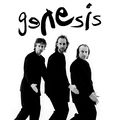

In [54]:
# picture
from IPython import display

url = data['picture']
r = requests.get(url)
display.Image(data=r.content)

In [58]:
# tracklist
url = data["tracklist"]
r = requests.get(url)
dico = r.json()
type(dico["data"]), type(dico["data"][0]), dico["data"][0].keys()

(list,
 dict,
 dict_keys(['id', 'readable', 'title', 'title_short', 'title_version', 'link', 'duration', 'rank', 'explicit_lyrics', 'explicit_content_lyrics', 'explicit_content_cover', 'preview', 'contributors', 'md5_image', 'artist', 'album', 'type']))

In [63]:
len(dico["data"])

50

In [60]:
dico["data"][0]["title"]

"I Can't Dance"

In [61]:
dico["data"][0]["preview"]

'https://cdnt-preview.dzcdn.net/api/1/1/3/e/5/0/3e58a0b5f4f011e8884101b98d0dcfbc.mp3?hdnea=exp=1764862276~acl=/api/1/1/3/e/5/0/3e58a0b5f4f011e8884101b98d0dcfbc.mp3*~data=user_id=0,application_id=42~hmac=9a5e236c2c42e190b7aced3ec2ab5532e05b046a8ac1f8d36e792e58891e04df'

In [68]:
display.Video(url=dico["data"][0]["preview"])

**Exercice**

- Récupérer la liste des titres avec une list comprehension,
- Jouer un morceau à partir du titre avec `IPython.display.Video()`

In [62]:
titles = [dico["title"] for dico in dico["data"]]
len(titles)

50

In [66]:
idx = titles.index('Home by the Sea (Platinum Collection Version)')
dico["data"][idx]["preview"]

'https://cdnt-preview.dzcdn.net/api/1/1/1/5/b/0/15b9b7e370c4f9672925c3318094ec87.mp3?hdnea=exp=1764862276~acl=/api/1/1/1/5/b/0/15b9b7e370c4f9672925c3318094ec87.mp3*~data=user_id=0,application_id=42~hmac=7e8db381c9fb6db346024789f15690bdcc11c260e019cee04718d1bf45a80e63'

#### Avantages d'une API
- renvoie du format JSON, (ou texte ou XML), facile et rapide à traiter
- renvoie un format stable et documenté (voire versionné)
- exemple : https://github.com/bluesky-social/atproto
- la documentation indique comment interagir avec l'API:
    - quelle URL utiliser,
    - quelle méthode HTTP (GET, POST, ...),
    - quels paramètres utiliser,
    - ...

=> idéal pour les développeurs

### Quel intérêt pour le fournisseur d'API ?

En général il met en place des quotas de requêtes ou d'autres limitations afin de proposer un service payant qui dispose de possibilités avancées / d'un meilleur support / etc.

C'est pourquoi de nombreux services nécessitent de se connecter avec son compte client pour utiliser une API (e.g. https://openweathermap.org/api)

#### Basic Auth

Exemple: accéder à https://yotta-conseil.fr/private/

Pour y accéder il est nécessaire d'utiliser les credentials suivant:
- *login* : `'admin'`
- *password* : `'secret'`

Si on ne les passe pas (ou si on ne passe pas les bons), on a obtient une erreur 401 (= unauthorized).

In [69]:
# sans login/password
res = requests.get('https://yotta-conseil.fr/private')
res

<Response [401]>

In [70]:
# avec login password
res = requests.get('https://yotta-conseil.fr/private', auth=('admin', 'secret'))
res

<Response [200]>

In [71]:
# contenu
res.content.decode('utf-8')

'<!doctype html>\n<html lang="en">\n<head>\n  <meta charset="utf-8" />\n  <meta name="viewport" content="width=device-width,initial-scale=1" />\n  <title>Connection Status</title>\n  <style>\n    html,body { height:100%; margin:0; font-family:system-ui,-apple-system,Segoe UI,Roboto,"Helvetica Neue",Arial; }\n    .wrap{\n      height:100%;\n      display:flex;\n      align-items:center;\n      justify-content:center;\n      background:#f6fff6;\n    }\n    .card{\n      padding:28px 36px;\n      border-radius:12px;\n      box-shadow:0 6px 20px rgba(0,0,0,0.08);\n      text-align:center;\n      border:1px solid rgba(0,0,0,0.04);\n    }\n    h1 { margin:0 0 6px; font-size:20px; }\n    p { margin:0; color:#333; font-size:14px; }\n  </style>\n</head>\n<body>\n  <div class="wrap">\n    <div class="card" role="status" aria-live="polite">\n      <h1>✅ Successfully connected!</h1>\n      <p>Your connection looks good.</p>\n    </div>\n  </div>\n</body>\n</html>\n'

<p style="color:red;">Attention, ne pas mettre les credentials dans le code !</p>

Exemple avec la librairie **dotenv**.

```bash
pip install python-dotenv
```

La librairie peut gérer les variables d'environnement et également parser des fichiers de type `.env`.

```txt
username=admin
password=secret
```

In [ ]:
#!pip install python-dotenv

In [72]:
# .env pour masquer auth credentials
# fichier .env avec les credentials

from dotenv import dotenv_values

config = dotenv_values(".env0")

requests.get('https://yotta-conseil.fr/private', auth=(config['username'], config['password']))

<Response [200]>

#### Auth par token

Exemple sur openweathermap :
- documentation: https://openweathermap.org/appid
- mes tokens: https://home.openweathermap.org/api_keys

In [73]:
# requête avec un token
config = dotenv_values(".env")
token = config["owm_token"]
n = 4
print(f"{token[:n]}{"x"*(len(token)-2*n)}{token[-n:]}")

d93fxxxxxxxxxxxxxxxxxxxxxxxx99fa


Avantage des tokens :
- évite que les requêtes HTTP contiennent le mot de passe - à la place elles contiennent un token
- si je me fais "voler" un token, je peux le supprimer de mon compte et en créer un nouveau

In [74]:
# requête avec un token
ville="Paris"
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={token}&q={ville}"
res = requests.get(url)
meteo = res.json()
meteo

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 282.19,
  'feels_like': 280.17,
  'temp_min': 281.6,
  'temp_max': 282.64,
  'pressure': 1003,
  'humidity': 86,
  'sea_level': 1003,
  'grnd_level': 993},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 230},
 'clouds': {'all': 0},
 'dt': 1764862534,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1764833197,
  'sunset': 1764863726},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [75]:
# type
type(meteo)

dict

In [76]:
# extractions
{'city': meteo['name'],
'country': meteo['sys']['country'],
'date': meteo['dt'],
'temp': meteo['main']['temp']}

{'city': 'Paris', 'country': 'FR', 'date': 1764862534, 'temp': 282.19}

In [77]:
# extractions
import time

{'city': meteo['name'],
'country': meteo['sys']['country'],
'date': time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(meteo['dt'])),
'temp': f"{meteo['main']['temp'] - 273.15:.1f}",}

{'city': 'Paris',
 'country': 'FR',
 'date': '2025-12-04 16:35:34',
 'temp': '9.0'}

**Exercice**

Se créer un compte sur **BlueSky** et requêter des posts. Nécessite d'installer la librairie **atproto**.

Doc : https://atproto.blue/en/latest/atproto/atproto_client.models.app.bsky.feed.search_posts.html

```python
import atproto

# get credentials
config = dotenv_values(".env")

# atproto client
client = atproto.Client()
client.login(config['username_bsky'], config['password_bsky'])

# réponse limitée à 25 posts par défaut, maximum = 100, ensuite il faut gérer un curseur
response = client.app.bsky.feed.search_posts(q="...", ...)
```

Liste des posts : `response.posts`

Pour chaque post :
- `post.record` (`.text`, `.created_at`)
- `post.author` (`.handle`)
- `post.uri`
- `post.*_count` (engagements : bookmark, like, quote, reply, repost)

Ensuite, possibilité de faire du NLP sur les textes des posts.

```python
# réponse limitée également, ensuite il faut gérer un curseur
response = client.app.bsky.graph.get_followers(actor="...", ...)
```

Ensuite, possibilité de faire des graphes sur les followers.